In [1]:
import ROOT as rt
import root_numpy as rtnp
import numpy as np
import csv
from matplotlib import pyplot as plt
from histo_utilities import create_TH1D, create_TH2D, std_color_list
from array import array
from prettytable import PrettyTable


import CMS_lumi, tdrstyle
tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 1
CMS_lumi.extraText = "     Simulation Preliminary"

donotdelete = []

Welcome to JupyROOT 6.13/02


In [2]:
fpath = {}
tree = {}
#without ISR
fpath['ggh'] = '/home/cms/Desktop/LLP/jetNtuple_RunIISummer16/withoutISR/jetNtuple_glueball/jet_timing_studies_ntuple_ggh_mh125_mx50_pl1000_ev10000.root'
fpath['vbfh'] = '/home/cms/Desktop/LLP/jetNtuple_RunIISummer16/withoutISR/jetNtuple_glueball/jet_timing_studies_ntuple_vbfh_mh125_mx50_pl1000_ev10000.root'
fpath['wh'] = '/home/cms/Desktop/LLP/jetNtuple_RunIISummer16/withoutISR/jetNtuple_glueball/jet_timing_studies_ntuple_wh_mh125_mx50_pl1000_ev10000.root'
fpath['zh'] = '/home/cms/Desktop/LLP/jetNtuple_RunIISummer16/withoutISR/jetNtuple_glueball/jet_timing_studies_ntuple_zh_mh125_mx50_pl1000_ev10000.root'

#withISR
# fpath['ggh'] = '/home/cms/Desktop/LLP/jetNtuple_RunIISummer16/withISR/jet_timing_studies_ntuple_ggh_ISR_mh125_mx50_pl1000_ev100000.root'
# fpath['vbfh'] = '/home/cms/Desktop/LLP/jetNtuple_RunIISummer16/withISR/jet_timing_studies_ntuple_vbfh_ISR_mh125_mx50_pl1000_ev100000.root'



for k,v in fpath.iteritems():
    print k, v
    tree[k] = rtnp.root2array(v)
    #tree[k] = rtnp.tree2array(v)
    #jet_max_pt_array = [np.max(x) for x in tree[k]["jetPt"]]
    a = tree[k]["jetPt"]
    print a[:-1][0]
    

zh /home/cms/Desktop/LLP/jetNtuple_RunIISummer16/withoutISR/jetNtuple_glueball/jet_timing_studies_ntuple_zh_mh125_mx50_pl1000_ev10000.root
[80.029945 45.671917 37.31981  29.627516 29.349512 21.029001]
ggh /home/cms/Desktop/LLP/jetNtuple_RunIISummer16/withoutISR/jetNtuple_glueball/jet_timing_studies_ntuple_ggh_mh125_mx50_pl1000_ev10000.root
[]
vbfh /home/cms/Desktop/LLP/jetNtuple_RunIISummer16/withoutISR/jetNtuple_glueball/jet_timing_studies_ntuple_vbfh_mh125_mx50_pl1000_ev10000.root
[163.69531  86.49124]
wh /home/cms/Desktop/LLP/jetNtuple_RunIISummer16/withoutISR/jetNtuple_glueball/jet_timing_studies_ntuple_wh_mh125_mx50_pl1000_ev10000.root
[28.754366]


In [37]:
# label['ggHm50ct100mmWISR'] = 'ggH M_{X} = 50 GeV, c#tau = 100 mm'
legend = {
    'zee':'Z(ee)',
    'zmumu':'Z(#mu#mu)',
    'znunu':'Z(#nu#nu)',
    'zhad':'Z(hadronic)',
    'wenu':'W(e#nu)',
    'wmunu':'W(#mu#nu)',
    'whad':'W(hadronic)',
    'vbfh':'vbfH',
    'ggh':'ggH',
}
lumi = (37.80+44.98+63.67) * 1000 #in pb, CMS recorded 2016 + 2017 + 2018
br = {
    'zee':0.033632,
    'zmumu':0.033662,
    'znunu':0.20000,
    'zhad':0.69911,
    'wenu':0.1071,
    'wmunu':0.1063,
    'whad':0.6741,
    'vbfh':1,
    'ggh':1,
}


cs = {
    'zee':0.88,
    'zmumu':0.88,
    'znunu':0.88,
    'zhad':0.88,
    'wenu':1.37,
    'wmunu':1.37,
    'whad':1.37,
    'vbfh':3.78,
    'ggh':44.1,
} #in pb


n_mc = {}
for k,v in cs.items():
    n_mc[k] = lumi*br[k]*cs[k]
    print(n_mc[k])
    
# cs = {
#     'ggh':0.441,
#     'vbfh':0.0378,
#     'wh':0.0137,
#     'zh':0.0088
# } #in pb

21488.16915
135249.06465
25775.2
4334.357632
90098.50036
21327.65995
4338.223912
6458445.0
553581.0


In [4]:
trigger_names_file = '/home/cms/Desktop/LLP/delayed_jet_analyzer/data/TriggerNames_LLP_V1.dat'
trigger_names = []
with open(trigger_names_file) as f:
    reader = csv.reader(f, delimiter=" ")
    for line in reader:
        trigger_names.append(line[2])

# Trigger efficiency table

In [19]:
# inclusive trigger efficiency * acceptance
trigger_vbf = [310]
trigger_zh = [177,179,310,362,471]
trigger_wh = [136,196,310,84,471]
for tr in trigger_wh:
    print(trigger_names[tr])
trigger_decision = {}
table = PrettyTable()
table.field_names = ["Process","Trigger path","Produced","Efficiency (%)","# of Events"]

for k,v in cs.items():
    trigger_decision[k] = {}
for k,T in tree.items():
    
    gParticleId = T['gParticleId']
    gParticlePt = T['gParticlePt']
    gParticleMotherId = T['gParticleMotherId']
    gParticleMotherIndex = T['gParticleMotherIndex']
    gParticleStatus = T['gParticleStatus']
    hlt = T['HLTDecision']
    if k == 'zh':
        keys = ['zee','zmumu','znunu','zhad']
        for tr in trigger_zh:
            for key in keys:
                trigger_decision[key][tr] = []
        for i in range(len(T['isQCD'])): #loop over all events
            mumu = np.logical_and(np.logical_and(np.absolute(gParticleId[i]) == 13, np.absolute(gParticleMotherId[i]) == 23), gParticleStatus[i] == 1 )
            ee = np.logical_and(np.logical_and(np.absolute(gParticleId[i]) == 11, np.absolute(gParticleMotherId[i]) == 23), gParticleStatus[i] == 1 )
            nunu_temp = np.logical_or(np.logical_or(np.absolute(gParticleId[i]) == 12,np.absolute(gParticleId[i]) == 14),np.absolute(gParticleId[i]) == 16)
            nunu = np.logical_and(np.logical_and(nunu_temp, np.absolute(gParticleMotherId[i]) == 23), gParticleStatus[i] == 1 )
#             had = np.logical_not(np.logical_or(nunu,np.logical_or(mumu,ee)))
            had = np.logical_and(np.logical_and(np.absolute(gParticleId[i]) <= 6, np.absolute(gParticleMotherId[i]) == 23), gParticleStatus[i] == 23 )
            mother_id = gParticleMotherId[i][np.absolute(gParticleId[i]) == 13] 
            for tr in trigger_zh:
                if np.count_nonzero(mumu) == 2:
                    trigger_decision['zmumu'][tr].append(hlt[i][tr])
                    assert(np.count_nonzero(ee)==np.count_nonzero(nunu)==0)
                elif np.count_nonzero(ee) == 2:
                    trigger_decision['zee'][tr].append(hlt[i][tr])
                    assert(np.count_nonzero(mumu)==np.count_nonzero(nunu)==0)
                elif np.count_nonzero(nunu) == 2:
                    trigger_decision['znunu'][tr].append(hlt[i][tr])
                    assert(np.count_nonzero(ee)==np.count_nonzero(mumu)==0)
                elif np.count_nonzero(had) == 2:
                    trigger_decision['zhad'][tr].append(hlt[i][tr])
        # checking the br makes sense    
#         print("zmumu br:"+str(len(trigger_decision['zmumu'][177])*1.0/len(T['isQCD'])))
#         print("zee br:"+str(len(trigger_decision['zee'][177])*1.0/len(T['isQCD'])))
#         print("znunu br:"+str(len(trigger_decision['znunu'][177])*1.0/len(T['isQCD'])))
#         print("zhad br:"+str(len(trigger_decision['zhad'][177])*1.0/len(T['isQCD'])))
        for key in keys:
            trigger_or = np.zeros(np.array(trigger_decision[key][trigger_zh[0]]).shape)
            for tr in trigger_zh:
                trigger_or += np.array(trigger_decision[key][tr])
                eff = np.mean(trigger_decision[key][tr])
                num = eff* n_mc[key]
                if num > 0.01 and eff > 0.05:
                    table.add_row([key,trigger_names[tr],n_mc[key], round(100*eff,2),round(num,2)])
            eff = np.count_nonzero(trigger_or)*1.0/len(trigger_or)
            num = eff* n_mc[key]
            if eff > 0.05:
                table.add_row([key,"Or",n_mc[key], round(100*eff,2),round(num,2)])
    elif k == 'wh':
        keys = ['wenu','wmunu','whad']
        for tr in trigger_wh:
            for key in keys:
                trigger_decision[key][tr] = []
        for i in range(len(T['isQCD'])): #loop over all events
            mu = np.logical_and(np.logical_and(np.absolute(gParticleId[i]) == 13, np.absolute(gParticleMotherId[i]) == 24), gParticleMotherIndex[i] == 1 )
            e = np.logical_and(np.logical_and(np.absolute(gParticleId[i]) == 11, np.absolute(gParticleMotherId[i]) == 24), gParticleMotherIndex[i] == 1 )
            nu_temp = np.logical_or(np.logical_or(np.absolute(gParticleId[i]) == 12,np.absolute(gParticleId[i]) == 14),np.absolute(gParticleId[i]) == 16)
            nu = np.logical_and(np.logical_and(nu_temp, np.absolute(gParticleMotherId[i]) == 24), gParticleMotherIndex[i] == 1 )
            had = np.logical_and(np.logical_and(np.absolute(gParticleId[i]) <= 6, np.absolute(gParticleMotherId[i]) == 24), gParticleMotherIndex[i] == 1 )
            for tr in trigger_wh:
                if np.count_nonzero(mu) == 1 and np.count_nonzero(nu) == 1:
                    trigger_decision['wmunu'][tr].append(hlt[i][tr])
                    assert(np.count_nonzero(e)==np.count_nonzero(had)==0)
                elif np.count_nonzero(e) == 1 and np.count_nonzero(nu) == 1:
                    trigger_decision['wenu'][tr].append(hlt[i][tr])
                    assert(np.count_nonzero(mu)==np.count_nonzero(had)==0)
                elif np.count_nonzero(had) == 2:
                    trigger_decision['whad'][tr].append(hlt[i][tr])
                    assert(np.count_nonzero(mu)==np.count_nonzero(e)==np.count_nonzero(nu)==0)

#         # checking the br makes sense    
#         print("wmunu br:"+str(len(trigger_decision['wmunu'][177])*1.0/len(T['isQCD'])))
#         print("wenu br:"+str(len(trigger_decision['wenu'][177])*1.0/len(T['isQCD'])))
#         print("whad br:"+str(len(trigger_decision['whad'][177])*1.0/len(T['isQCD'])))
        for key in keys:
            trigger_or = np.zeros(np.array(trigger_decision[key][trigger_wh[0]]).shape)
            for tr in trigger_wh:
                trigger_or += np.array(trigger_decision[key][tr])
                eff = np.mean(trigger_decision[key][tr])
                num = eff* n_mc[key]
                if num > 0.01 and eff > 0.05:
                    table.add_row([key,trigger_names[tr],n_mc[key], round(100*eff,2),round(num,2)])
#                     print(key+', '+trigger_names[tr]+', '+str(round(100*eff))+'%, '+str(round(num,4)))
            eff = np.count_nonzero(trigger_or)*1.0/len(trigger_or)
            num = eff* n_mc[key]
            if eff > 0.05:
                table.add_row([key,"Or",n_mc[key], round(100*eff,2),round(num,2)])
            
    elif k == 'vbfh':
        keys = ['vbfh']
        for key in keys:
            for tr in trigger_vbf:
                a = hlt[:][tr]
                temp = 0
                for j in range(len(hlt)):
                    temp += hlt[j][tr]
                eff = 1.0*temp/len(hlt)
                num = eff* n_mc[key]
                if num > 0.01:
                    table.add_row([key,trigger_names[tr],n_mc[key], round(100*eff,2),round(num,2)])
    elif k == 'ggh':
        keys = [k]
        for key in keys:
            for tr in trigger_vbf:
                a = hlt[:][tr]
                temp = 0
                for j in range(len(hlt)):
                    temp += hlt[j][tr]
                eff = 1.0*temp/len(hlt)
                num = eff* n_mc[key]
                if num > 0.01:
                    table.add_row([key,trigger_names[tr],n_mc[key], round(100*eff,2),round(num,2)])
#                 print('inclusive trigger efficiency of '+ k + trigger_names[i]+': '+str(1.0*temp/len(hlt)))
print(table)

HLT_IsoMu27
HLT_Mu50
HLT_PFMET120_PFMHT120_IDTight
HLT_Ele30_WPTight_Gsf
HLT_MonoCentralPFJet80_PFMETNoMu120_PFMHTNoMu120_IDTight
+---------+----------------------------------------------------------+--------------+----------------+-------------+
| Process |                       Trigger path                       |   Produced   | Efficiency (%) | # of Events |
+---------+----------------------------------------------------------+--------------+----------------+-------------+
|   zee   |              HLT_PFMET120_PFMHT120_IDTight               | 4334.357632  |      12.1      |    524.44   |
|   zee   |        HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL_DZ         | 4334.357632  |     49.47      |   2144.04   |
|   zee   | HLT_MonoCentralPFJet80_PFMETNoMu120_PFMHTNoMu120_IDTight | 4334.357632  |      9.61      |    416.47   |
|   zee   |                            Or                            | 4334.357632  |     55.16      |   2390.84   |
|  zmumu  |           HLT_Mu17_TrkIsoVVL_Mu8_TrkIso

# PF MET for all processes

In [7]:
# inclusive trigger efficiency * acceptance
pfMet = {}
mht = {}
for k,v in cs.items():
    pfMet[k] = []
    mht[k] = []
for k,T in tree.items():
    gParticleId = T['gParticleId']
    gParticlePt = T['gParticlePt']
    gParticleMotherId = T['gParticleMotherId']
    gParticleMotherIndex = T['gParticleMotherIndex']
    gParticleStatus = T['gParticleStatus']
    jetE = T['jetE']
    jetPt = T['jetPt']
    jetEta = T['jetEta']
    jetPhi = T['jetPhi']
    hlt = T['HLTDecision']
    pfMetPt = T['pfMetPt']
    nJets = T['nJets']
    if k == 'zh':
        for i in range(len(T['isQCD'])): #loop over all events
            mumu = np.logical_and(np.logical_and(np.absolute(gParticleId[i]) == 13, np.absolute(gParticleMotherId[i]) == 23), gParticleStatus[i] == 1 )
            ee = np.logical_and(np.logical_and(np.absolute(gParticleId[i]) == 11, np.absolute(gParticleMotherId[i]) == 23), gParticleStatus[i] == 1 )
            nunu_temp = np.logical_or(np.logical_or(np.absolute(gParticleId[i]) == 12,np.absolute(gParticleId[i]) == 14),np.absolute(gParticleId[i]) == 16)
            nunu = np.logical_and(np.logical_and(nunu_temp, np.absolute(gParticleMotherId[i]) == 23), gParticleStatus[i] == 1 )
        #             had = np.logical_not(np.logical_or(nunu,np.logical_or(mumu,ee)))
            had = np.logical_and(np.logical_and(np.absolute(gParticleId[i]) <= 6, np.absolute(gParticleMotherId[i]) == 23), gParticleStatus[i] == 23 )
            mother_id = gParticleMotherId[i][np.absolute(gParticleId[i]) == 13] 
            if np.count_nonzero(mumu) == 2:
                key = 'zmumu'
            elif np.count_nonzero(ee) == 2:
                key = 'zee'
            elif np.count_nonzero(nunu) == 2:
                key = 'znunu'
                assert(np.count_nonzero(ee)==np.count_nonzero(mumu)==0)
            elif np.count_nonzero(had) == 2:
                key = 'zhad'
            else:
                key = None
            if not key is None:        
                #MHT & pfMet calculation
                jet_sum = rt.TLorentzVector()
                for j in range(nJets[i]):
                    temp = rt.TLorentzVector()
                    temp.SetPtEtaPhiE(jetPt[i][j],jetEta[i][j],jetPhi[i][j],jetE[i][j])
                    jet_sum += temp
                mht[key].append(jet_sum.Pt())
                pfMet[key].append(pfMetPt[i])
    elif k=='wh':
        for i in range(len(T['isQCD'])): #loop over all events
            mu = np.logical_and(np.logical_and(np.absolute(gParticleId[i]) == 13, np.absolute(gParticleMotherId[i]) == 24), gParticleMotherIndex[i] == 1 )
            e = np.logical_and(np.logical_and(np.absolute(gParticleId[i]) == 11, np.absolute(gParticleMotherId[i]) == 24), gParticleMotherIndex[i] == 1 )
            nu_temp = np.logical_or(np.logical_or(np.absolute(gParticleId[i]) == 12,np.absolute(gParticleId[i]) == 14),np.absolute(gParticleId[i]) == 16)
            nu = np.logical_and(np.logical_and(nu_temp, np.absolute(gParticleMotherId[i]) == 24), gParticleMotherIndex[i] == 1 )
            had = np.logical_and(np.logical_and(np.absolute(gParticleId[i]) <= 6, np.absolute(gParticleMotherId[i]) == 24), gParticleMotherIndex[i] == 1 )
            if np.count_nonzero(mu) == 1 and np.count_nonzero(nu) == 1:
                key = 'wmunu'
                assert(np.count_nonzero(e)==np.count_nonzero(had)==0)
            elif np.count_nonzero(e) == 1 and np.count_nonzero(nu) == 1:
                key = 'wenu'
                assert(np.count_nonzero(mu)==np.count_nonzero(had)==0)
            elif np.count_nonzero(had) == 2:
                key = 'whad'
                assert(np.count_nonzero(mu)==np.count_nonzero(e)==np.count_nonzero(nu)==0)
            if not key is None:        
                #MHT & pfMet calculation
                jet_sum = rt.TLorentzVector()
                for j in range(nJets[i]):
                    temp = rt.TLorentzVector()
                    temp.SetPtEtaPhiE(jetPt[i][j],jetEta[i][j],jetPhi[i][j],jetE[i][j])
                    jet_sum += temp
                mht[key].append(jet_sum.Pt())
                pfMet[key].append(pfMetPt[i])
    elif k=='vbfh' or k == 'ggh':
        #MHT & pfMet calculation
        key = k
        for i in range(len(T['isQCD'])): #loop over all events
            jet_sum = rt.TLorentzVector()
            for j in range(nJets[i]):
                temp = rt.TLorentzVector()
                temp.SetPtEtaPhiE(jetPt[i][j],jetEta[i][j],jetPhi[i][j],jetE[i][j])
                jet_sum += temp
            mht[key].append(jet_sum.Pt())
            pfMet[key].append(pfMetPt[i])


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


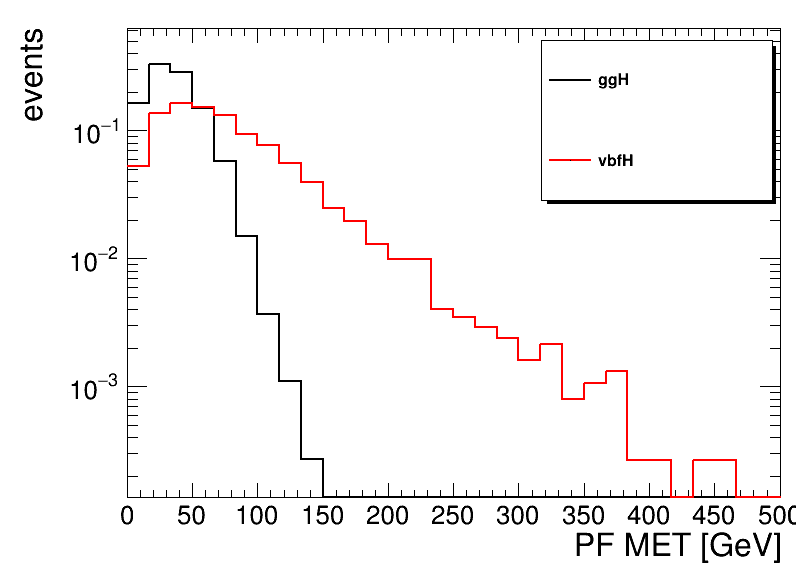

In [42]:
c = rt.TCanvas('c','c', 800, 600)
h = {}
leg = rt.TLegend(0.68,0.65,0.97,0.93);
leg.SetTextSize(0.03)
i = 0
for k,v in pfMet.items():
    if k=='vbfh' or k=='ggh':
        h[k] = create_TH1D( v, axis_title=['PF MET [GeV]', 'events'], name=k, binning=[30,0,500])
        h[k].SetLineColor(std_color_list[i])
        leg.AddEntry(h[k],legend[k])
    #     h[k].GetYaxis().SetRangeUser(0,300)
        if i == 0:
            h[k].DrawNormalized('')
        else:
            h[k].DrawNormalized('same')
        i += 1
leg.Draw()
c.SetLogy()
c.Draw()

# ZH Kinematics

In [169]:
# inclusive trigger efficiency * acceptance
trigger_zh = [177,179,310,362,471]#mu,mu, pfmet, ele,met
pfMet = {}
mht = {}
mu1_pt = []
mu2_pt = []
ele1_pt = []
ele2_pt = []
trigger_decision = {}

for k,v in cs.items():
    trigger_decision[k] = {}
T=tree['zh']    
gParticleId = T['gParticleId']
gParticlePt = T['gParticlePt']
gParticleMotherId = T['gParticleMotherId']
gParticleMotherIndex = T['gParticleMotherIndex']
gParticleStatus = T['gParticleStatus']
jetE = T['jetE']
jetPt = T['jetPt']
jetEta = T['jetEta']
jetPhi = T['jetPhi']
hlt = T['HLTDecision']
pfMetPt = T['pfMetPt']
nJets = T['nJets']
keys = ['zee','zmumu','znunu','zhad']


for tr in trigger_zh:
    for key in keys:
        trigger_decision[key][tr] = []
        pfMet[key] = []
        mht[key] = []
for i in range(len(T['isQCD'])): #loop over all events
    mumu = np.logical_and(np.logical_and(np.absolute(gParticleId[i]) == 13, np.absolute(gParticleMotherId[i]) == 23), gParticleStatus[i] == 1 )
    ee = np.logical_and(np.logical_and(np.absolute(gParticleId[i]) == 11, np.absolute(gParticleMotherId[i]) == 23), gParticleStatus[i] == 1 )
    nunu_temp = np.logical_or(np.logical_or(np.absolute(gParticleId[i]) == 12,np.absolute(gParticleId[i]) == 14),np.absolute(gParticleId[i]) == 16)
    nunu = np.logical_and(np.logical_and(nunu_temp, np.absolute(gParticleMotherId[i]) == 23), gParticleStatus[i] == 1 )
#             had = np.logical_not(np.logical_or(nunu,np.logical_or(mumu,ee)))
    had = np.logical_and(np.logical_and(np.absolute(gParticleId[i]) <= 6, np.absolute(gParticleMotherId[i]) == 23), gParticleStatus[i] == 23 )
    mother_id = gParticleMotherId[i][np.absolute(gParticleId[i]) == 13] 
    if np.count_nonzero(mumu) == 2:
        key = 'zmumu'
        mu_pt_temp = gParticlePt[i][mumu] # events where muons pass the pt cut
        mu1_pt.append(np.max(mu_pt_temp)) #save the max_pt muon
        mu2_pt.append(np.min(mu_pt_temp)) #save the max_pt muonassert(np.count_nonzero(ee)==np.count_nonzero(nunu)==0)
    elif np.count_nonzero(ee) == 2:
        key = 'zee'
        ele_pt_temp = gParticlePt[i][ee]
        ele1_pt.append(np.max(ele_pt_temp)) #save the max_pt ele
        ele2_pt.append(np.min(ele_pt_temp)) #save the max_pt eleassert(np.count_nonzero(mumu)==np.count_nonzero(nunu)==0)
    elif np.count_nonzero(nunu) == 2:
        key = 'znunu'
        assert(np.count_nonzero(ee)==np.count_nonzero(mumu)==0)
    elif np.count_nonzero(had) == 2:
        key = 'zhad'
    else:
        key = None
    if not key is None:        
        for tr in trigger_zh:
            trigger_decision[key][tr].append(hlt[i][tr])

        #MHT & pfMet calculation
        jet_sum = rt.TLorentzVector()
        for j in range(nJets[i]):
            temp = rt.TLorentzVector()
            temp.SetPtEtaPhiE(jetPt[i][j],jetEta[i][j],jetPhi[i][j],jetE[i][j])
            jet_sum += temp
        mht[key].append(jet_sum.Pt())
        pfMet[key].append(pfMetPt[i])

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: vbfh (Potential memory leak).
Info in <TCanvas::Print>: pdf file ../plots/trigger_efficiency/zh_ele_pt.pdf has been created


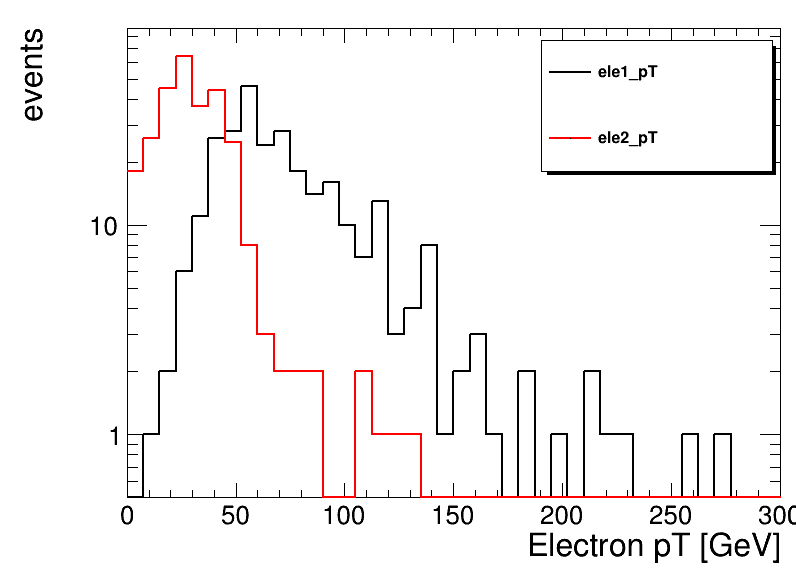

In [170]:
# Plotting muon pt
c = rt.TCanvas('c','c', 800, 600)
h = {}
leg = rt.TLegend(0.68,0.70,0.97,0.93);
leg.SetTextSize(0.03)

h['mu1_pt'] = create_TH1D( ele1_pt, axis_title=['Electron pT [GeV]', 'events'], name=k, binning=[40,0,300])
h['mu1_pt'].SetLineColor(std_color_list[0])
h['mu1_pt'].Draw('')
h['mu2_pt'] = create_TH1D( ele2_pt, axis_title=['Electron pT [GeV]', 'events'], name=k, binning=[40,0,300])
h['mu2_pt'].SetLineColor(std_color_list[1])
h['mu2_pt'].Draw('same')
leg.AddEntry(h['mu1_pt'],'ele1_pT')
leg.AddEntry(h['mu2_pt'],'ele2_pT')

c.SetLogy()
leg.Draw()
c.Draw()

c.SaveAs("../../plots/trigger_efficiency/zh_ele_pt.pdf")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: vbfh (Potential memory leak).
Info in <TCanvas::Print>: pdf file ../plots/trigger_efficiency/zee_mht_pfmet.pdf has been created


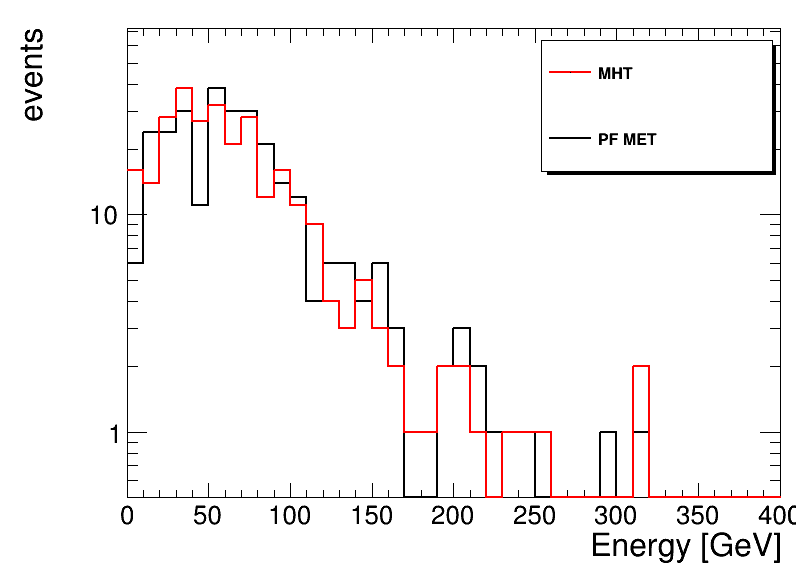

In [64]:
# Plotting muon pt
c = rt.TCanvas('c','c', 800, 600)
h = {}
leg = rt.TLegend(0.68,0.70,0.97,0.93);
leg.SetTextSize(0.03)
key = 'zee'
h['pfmet'] = create_TH1D( pfMet[key], axis_title=['Energy [GeV]', 'events'], name=k, binning=[40,0,400])
h['pfmet'].SetLineColor(std_color_list[0])
h['pfmet'].Draw('')
h['mht'] = create_TH1D( mht[key], axis_title=['Energy [GeV]', 'events'], name=k, binning=[40,0,400])
h['mht'].SetLineColor(std_color_list[1])
h['mht'].Draw('same')
leg.AddEntry(h['mht'],'MHT')
leg.AddEntry(h['pfmet'],'PF MET')

c.SetLogy()
leg.Draw()
c.Draw()

c.SaveAs("../../plots/trigger_efficiency/"+key+"_mht_pfmet.pdf")

# ZH turn on

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file ../plots/trigger_efficiency/zh_trigger362_elept.pdf has been created


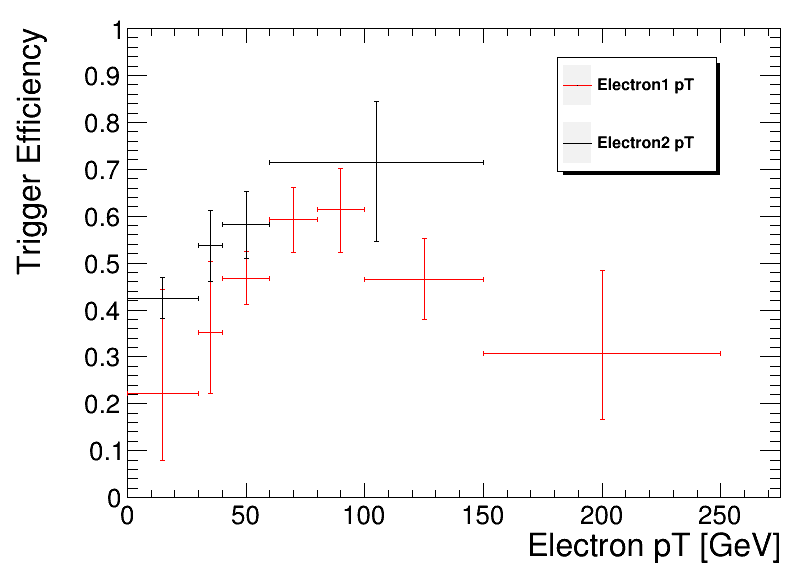

In [178]:

# efficiency vs pfmet
# Plotting efficiency vs muon pt
pfMet = [x for x in T['pfMetPt']]
pfMet = np.array(pfMet)
hlt = T['HLTDecision']
trigger = [x[309] for x in hlt]
trigger = np.array(trigger)


c = rt.TCanvas('c','c', 800, 600)
h = {}
leg = rt.TLegend(0.7,0.70,0.9,0.9);
leg.SetTextSize(0.03)
xaxis = ele1_pt

bins = [0,30,40,60,80,100,150,250]
# bins = [0,10,20,30,40,50,100]
xaxis_title = "Electron pT [GeV]"

hm = create_TH1D(xaxis, 'hm1', axis_title = [xaxis_title,'Trigger Efficiency'], binning=bins,weights = trigger_decision['zee'][362])
hb = create_TH1D(xaxis, 'hb1', axis_title = [xaxis_title,'Trigger Efficiency'], binning=bins)
pEff1 = rt.TEfficiency(hm,hb)
pEff1.SetLineColor(std_color_list[0])
pEff1.Draw()

xaxis = ele2_pt
bins = [0,30,40,60,150]
hm = create_TH1D(xaxis, 'hm2', axis_title = [xaxis_title,'Trigger Efficiency'], binning=bins,weights = trigger_decision['zee'][362])
hb = create_TH1D(xaxis, 'hb2', axis_title = [xaxis_title,'Trigger Efficiency'], binning=bins)
pEff2 = rt.TEfficiency(hm,hb)
pEff1.SetLineColor(std_color_list[1])
pEff2.Draw('same')
leg.AddEntry(pEff1,'Electron1 pT')
leg.AddEntry(pEff2,'Electron2 pT')

# hb.Draw()
# hb.Draw()
# hm.Draw('same')
leg.Draw()
# c.SetLogy()
c.Draw()
pEff1.GetPaintedGraph().GetYaxis().SetRangeUser(0,1)

c.SaveAs("../../plots/trigger_efficiency/zh_trigger362_elept.pdf")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file ../plots/trigger_efficiency/zh_trigger177_mupt.pdf has been created


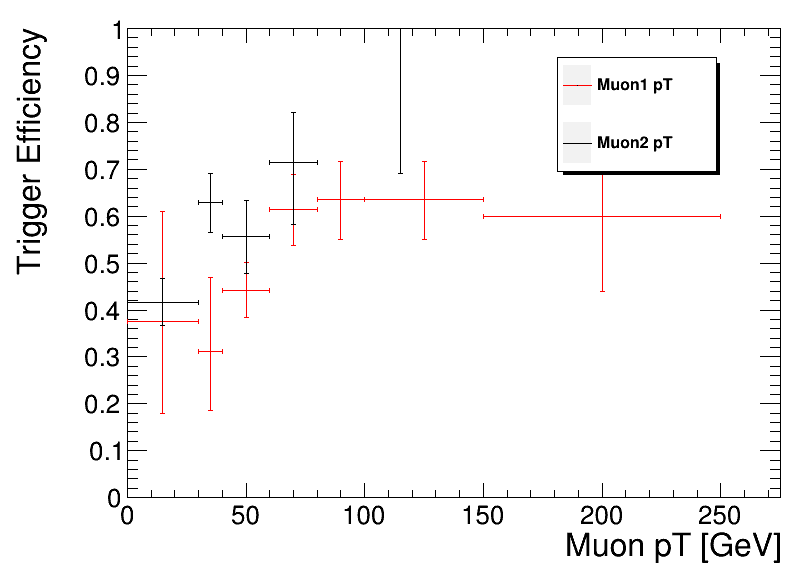

In [53]:

# efficiency vs pfmet

c = rt.TCanvas('c','c', 800, 600)
h = {}
leg = rt.TLegend(0.7,0.70,0.9,0.9);
leg.SetTextSize(0.03)
xaxis = mu1_pt

bins = [0,30,40,60,80,100,150,250]
# bins = [0,10,20,30,40,50,100]
xaxis_title = "Muon pT [GeV]"

hm = create_TH1D(xaxis, 'hm1', axis_title = [xaxis_title,'Trigger Efficiency'], binning=bins,weights = trigger_decision['zmumu'][177])
hb = create_TH1D(xaxis, 'hb1', axis_title = [xaxis_title,'Trigger Efficiency'], binning=bins)
pEff1 = rt.TEfficiency(hm,hb)
pEff1.SetLineColor(std_color_list[0])
pEff1.Draw()

xaxis = mu2_pt
bins = [0,30,40,60,80,150]
hm = create_TH1D(xaxis, 'hm2', axis_title = [xaxis_title,'Trigger Efficiency'], binning=bins,weights = trigger_decision['zmumu'][177])
hb = create_TH1D(xaxis, 'hb2', axis_title = [xaxis_title,'Trigger Efficiency'], binning=bins)
pEff2 = rt.TEfficiency(hm,hb)
pEff1.SetLineColor(std_color_list[1])
pEff2.Draw('same')
leg.AddEntry(pEff1,'Muon1 pT')
leg.AddEntry(pEff2,'Muon2 pT')

# hb.Draw()
# hb.Draw()
# hm.Draw('same')
leg.Draw()
# c.SetLogy()
c.Draw()
pEff1.GetPaintedGraph().GetYaxis().SetRangeUser(0,1)

c.SaveAs("../../plots/trigger_efficiency/zh_trigger177_mupt.pdf")

(5725, 5725)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file ../plots/trigger_efficiency/zhad_trigeff_pfmet.pdf has been created


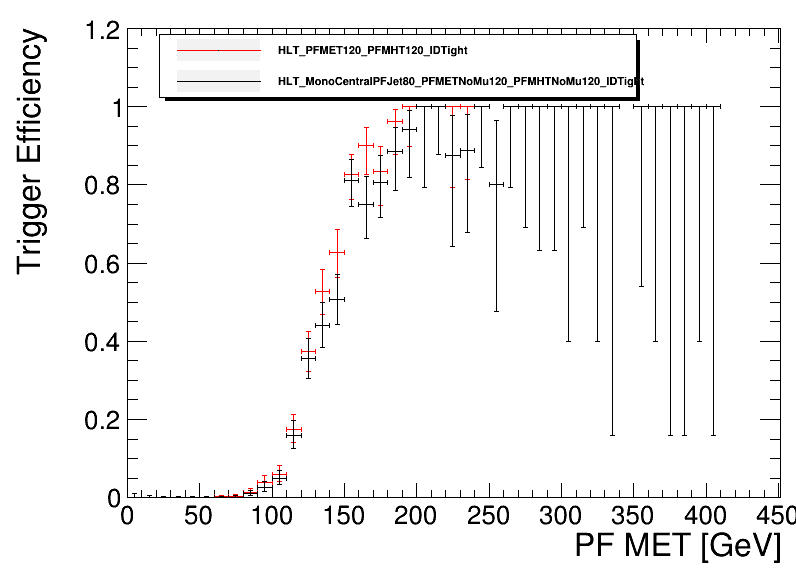

In [98]:
# efficiency vs pfmet

c = rt.TCanvas('c','c', 800, 600)
h = {}
leg = rt.TLegend(0.2,0.83,0.8,0.94);
leg.SetTextSize(0.02)
key = 'zhad'
xaxis = pfMet[key]

bins = [0,30,40,60,80,100,150,250]
# bins = [0,10,20,30,40,50,100]
xaxis_title = "PF MET [GeV]"
print(len(xaxis),len(trigger_decision[key][310]))
hm = create_TH1D(xaxis, 'hm1', axis_title = [xaxis_title,'Trigger Efficiency'], binning=[50,0,500],weights = trigger_decision[key][310])
hb = create_TH1D(xaxis, 'hb1', axis_title = [xaxis_title,'Trigger Efficiency'], binning=[50,0,500])
pEff1 = rt.TEfficiency(hm,hb)
pEff1.SetLineColor(std_color_list[0])
pEff1.Draw()

hm = create_TH1D(xaxis, 'hm2', axis_title = [xaxis_title,'Trigger Efficiency'], binning=[50,0,500],weights = trigger_decision[key][471])
hb = create_TH1D(xaxis, 'hb2', axis_title = [xaxis_title,'Trigger Efficiency'], binning=[50,0,500])
pEff2 = rt.TEfficiency(hm,hb)
pEff1.SetLineColor(std_color_list[1])
pEff2.Draw('same')
leg.AddEntry(pEff1,trigger_names[310])
leg.AddEntry(pEff2,trigger_names[471])

# hb.Draw()
# hb.Draw()
# hm.Draw('same')
leg.Draw()
# c.SetLogy()
c.Draw()
pEff1.GetPaintedGraph().GetYaxis().SetRangeUser(0,1.2)

c.SaveAs("../../plots/trigger_efficiency/zhad_trigeff_pfmet.pdf")

# WH sample kinematics

In [114]:
# inclusive trigger efficiency * acceptance
trigger_wh = [136,196,310,84,471]#mu,mu,met,ele,met
pfMet = {}
mht = {}
mu_pt = []
ele_pt = []
trigger_decision = {}

for k,v in cs.items():
    trigger_decision[k] = {}
T=tree['wh']    
gParticleId = T['gParticleId']
gParticlePt = T['gParticlePt']
gParticleMotherId = T['gParticleMotherId']
gParticleMotherIndex = T['gParticleMotherIndex']
gParticleStatus = T['gParticleStatus']
jetE = T['jetE']
jetPt = T['jetPt']
jetEta = T['jetEta']
jetPhi = T['jetPhi']
hlt = T['HLTDecision']
pfMetPt = T['pfMetPt']
nJets = T['nJets']
keys = ['wmunu','wenu','whad']


for tr in trigger_wh:
    for key in keys:
        trigger_decision[key][tr] = []
        pfMet[key] = []
        mht[key] = []
for i in range(len(T['isQCD'])): #loop over all events
    mu = np.logical_and(np.logical_and(np.absolute(gParticleId[i]) == 13, np.absolute(gParticleMotherId[i]) == 24), gParticleMotherIndex[i] == 1 )
    e = np.logical_and(np.logical_and(np.absolute(gParticleId[i]) == 11, np.absolute(gParticleMotherId[i]) == 24), gParticleMotherIndex[i] == 1 )
    nu_temp = np.logical_or(np.logical_or(np.absolute(gParticleId[i]) == 12,np.absolute(gParticleId[i]) == 14),np.absolute(gParticleId[i]) == 16)
    nu = np.logical_and(np.logical_and(nu_temp, np.absolute(gParticleMotherId[i]) == 24), gParticleMotherIndex[i] == 1 )
    had = np.logical_and(np.logical_and(np.absolute(gParticleId[i]) <= 6, np.absolute(gParticleMotherId[i]) == 24), gParticleMotherIndex[i] == 1 )

                    
    if np.count_nonzero(mu) == 1 and np.count_nonzero(nu) == 1:
        key = 'wmunu'
        mu_pt_temp = gParticlePt[i][mu] # events where muons pass the pt cut
        assert(len(mu_pt_temp) == 1)
        mu_pt.append(mu_pt_temp[0]) #save the max_pt muon
        assert(np.count_nonzero(e)==np.count_nonzero(had)==0)
    elif  np.count_nonzero(e) == 1 and np.count_nonzero(nu) == 1:
        key = 'wenu'
        ele_pt_temp = gParticlePt[i][e]
        assert(len(ele_pt_temp) == 1)
        ele_pt.append(np.max(ele_pt_temp)) #save the max_pt ele
        assert(np.count_nonzero(mu)==np.count_nonzero(had)==0)
    elif  np.count_nonzero(had) == 2:
        key = 'whad'
        assert(np.count_nonzero(mu)==np.count_nonzero(e)==np.count_nonzero(nu)==0)
    else:
        key = None
    if not key is None:        
        for tr in trigger_wh:
            trigger_decision[key][tr].append(hlt[i][tr])

        #MHT & pfMet calculation
        jet_sum = rt.TLorentzVector()
        for j in range(nJets[i]):
            temp = rt.TLorentzVector()
            temp.SetPtEtaPhiE(jetPt[i][j],jetEta[i][j],jetPhi[i][j],jetE[i][j])
            jet_sum += temp
        mht[key].append(jet_sum.Pt())
        pfMet[key].append(pfMetPt[i])

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file ../plots/trigger_efficiency/whmunu_mupt_pfmet.pdf has been created


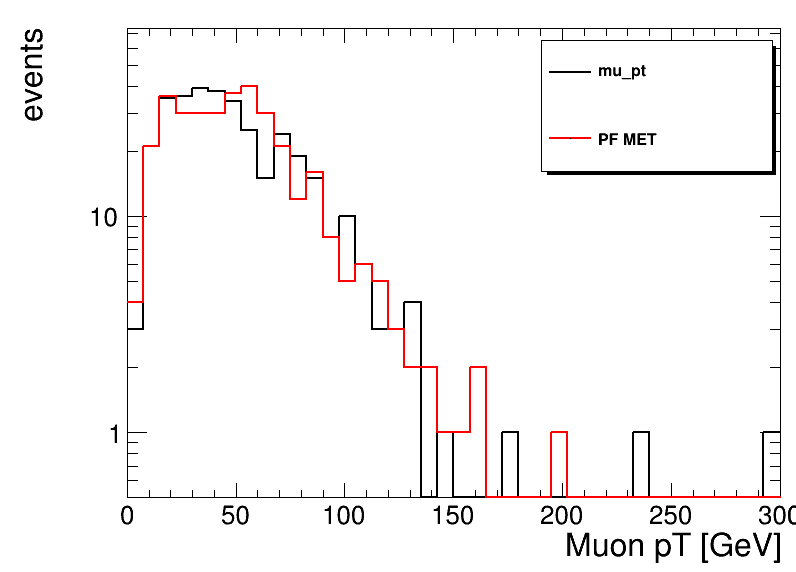

In [106]:
# Plotting muon pt
c = rt.TCanvas('c','c', 800, 600)
h = {}
leg = rt.TLegend(0.68,0.70,0.97,0.93);
leg.SetTextSize(0.03)

h['mu_pt'] = create_TH1D( mu_pt, axis_title=['Muon pT [GeV]', 'events'], name='mu_pt', binning=[40,0,300])
h['mu_pt'].SetLineColor(std_color_list[0])
h['mu_pt'].Draw('')
h['pfMet'] = create_TH1D( pfMet['wmunu'], axis_title=['PF MET [GeV]', 'events'], name='pfMet', binning=[40,0,300])
h['pfMet'].SetLineColor(std_color_list[1])
h['pfMet'].Draw('same')
leg.AddEntry(h['mu_pt'],'mu_pt')
leg.AddEntry(h['pfMet'],'PF MET')

c.SetLogy()
leg.Draw()
c.Draw()

c.SaveAs("../../plots/trigger_efficiency/whmunu_mupt_pfmet.pdf")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file ../plots/trigger_efficiency/whenu_ept_pfmet.pdf has been created


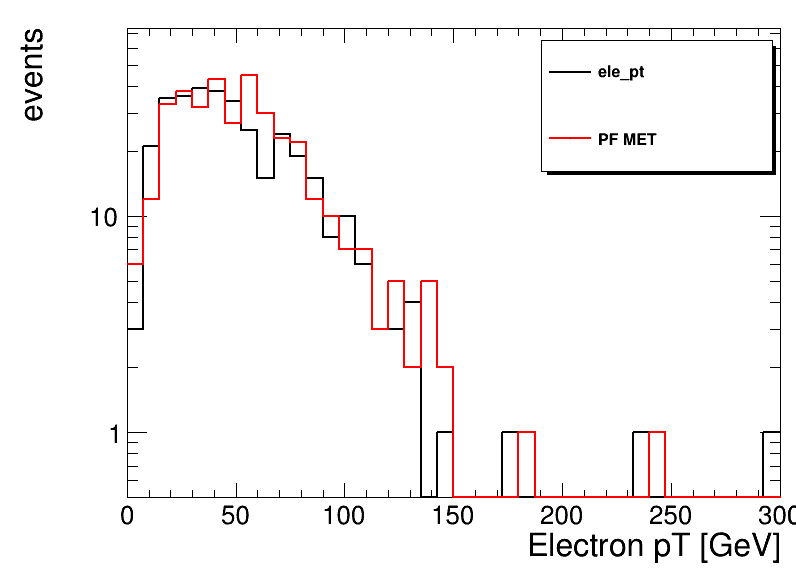

In [107]:
# Plotting muon pt
c = rt.TCanvas('c','c', 800, 600)
h = {}
leg = rt.TLegend(0.68,0.70,0.97,0.93);
leg.SetTextSize(0.03)

h['ele_pt'] = create_TH1D( mu_pt, axis_title=['Electron pT [GeV]', 'events'], name='ele_pt', binning=[40,0,300])
h['ele_pt'].SetLineColor(std_color_list[0])
h['ele_pt'].Draw('')
h['pfMet'] = create_TH1D( pfMet['wenu'], axis_title=['PF MET [GeV]', 'events'], name='pfMet', binning=[40,0,300])
h['pfMet'].SetLineColor(std_color_list[1])
h['pfMet'].Draw('same')
leg.AddEntry(h['ele_pt'],'ele_pt')
leg.AddEntry(h['pfMet'],'PF MET')

c.SetLogy()
leg.Draw()
c.Draw()

c.SaveAs("../../plots/trigger_efficiency/whenu_ept_pfmet.pdf")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file ../plots/trigger_efficiency/whad_mht_pfmet.pdf has been created


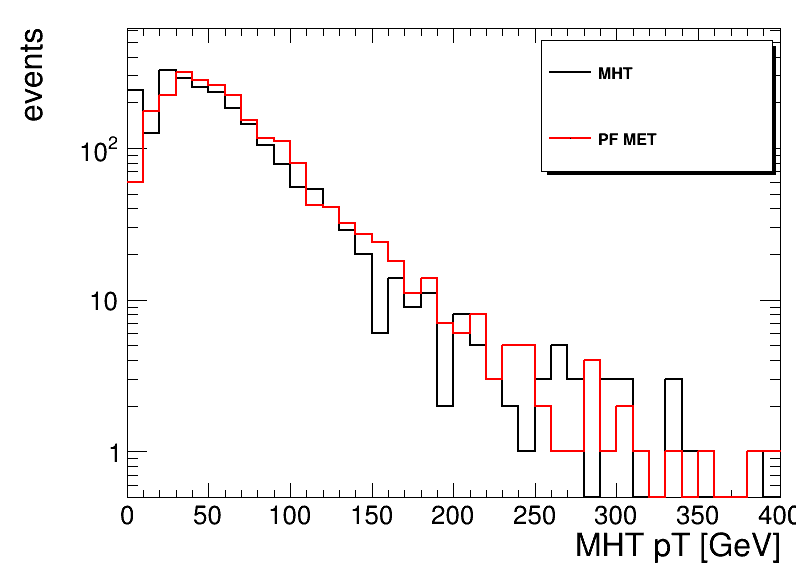

In [109]:
# Plotting muon pt
c = rt.TCanvas('c','c', 800, 600)
h = {}
leg = rt.TLegend(0.68,0.70,0.97,0.93);
leg.SetTextSize(0.03)

h['mht'] = create_TH1D( mht['whad'], axis_title=['MHT pT [GeV]', 'events'], name='mht', binning=[40,0,400])
h['mht'].SetLineColor(std_color_list[0])
h['mht'].Draw('')
h['pfMet'] = create_TH1D( pfMet['whad'], axis_title=['PF MET [GeV]', 'events'], name='pfMet', binning=[40,0,400])
h['pfMet'].SetLineColor(std_color_list[1])
h['pfMet'].Draw('same')
leg.AddEntry(h['mht'],'MHT')
leg.AddEntry(h['pfMet'],'PF MET')

c.SetLogy()
leg.Draw()
c.Draw()

c.SaveAs("../../plots/trigger_efficiency/whad_mht_pfmet.pdf")




Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Info in <TCanvas::Print>: pdf file ../plots/trigger_efficiency/whad_pfmet_mht_2d.pdf has been created


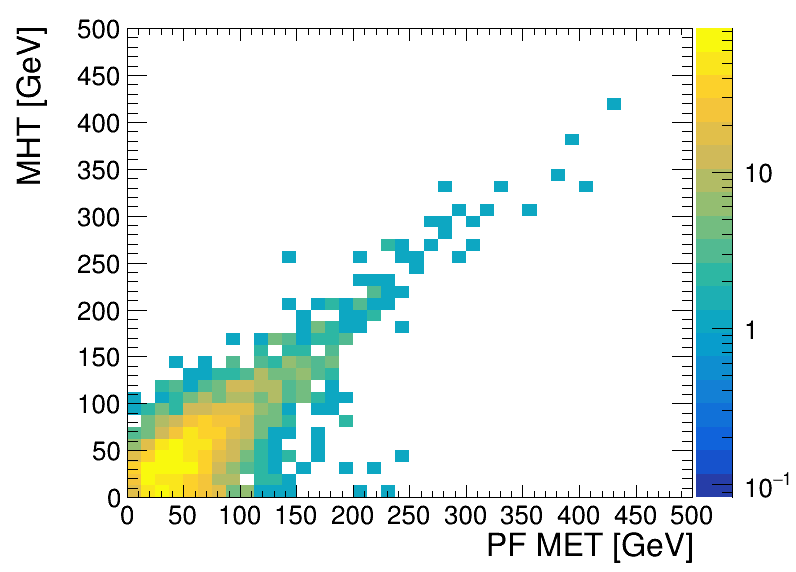

In [110]:
c = rt.TCanvas('c1','c1', 800, 600)
key = 'whad'
mapping = create_TH2D(np.column_stack((pfMet[key],mht[key])), axis_title = ['PF MET [GeV]','MHT [GeV]','Events'], binning=[40,0,500,40,0,500])
mapping.Draw('colz')
c.SetRightMargin(0.13)
c.SetLogz()
c.Draw()
c.SaveAs("../../plots/trigger_efficiency/"+key+"_pfmet_mht_2d.pdf")


# WH turn on curves

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: hm1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hb1 (Potential memory leak).
Info in <TCanvas::Print>: pdf file ../plots/trigger_efficiency/wenu_trigger84_elept.pdf has been created


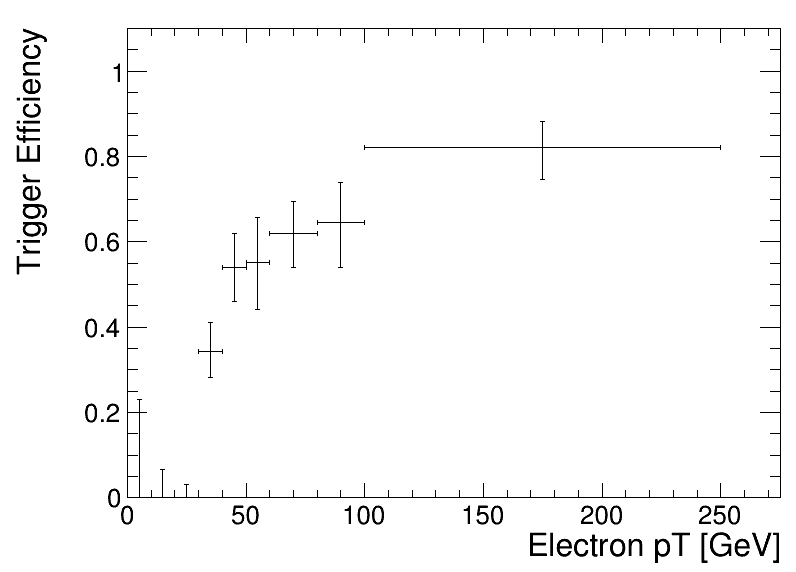

In [124]:
# W ->e nu
# efficiency vs pfmet
# Plotting efficiency vs muon pt

c = rt.TCanvas('c','c', 800, 600)
h = {}
leg = rt.TLegend(0.7,0.70,0.9,0.9);
leg.SetTextSize(0.03)

xaxis = ele_pt
bins = [0,10,20,30,40,50,60,80,100,250]
# bins = [0,10,20,30,40,50,100]
xaxis_title = "Electron pT [GeV]"
hm = create_TH1D(xaxis, 'hm1', axis_title = [xaxis_title,'Trigger Efficiency'], binning=bins,weights = trigger_decision['wenu'][84])
hb = create_TH1D(xaxis, 'hb1', axis_title = [xaxis_title,'Trigger Efficiency'], binning=bins)
pEff1 = rt.TEfficiency(hm,hb)
pEff1.SetLineColor(std_color_list[0])
pEff1.Draw()


# hb.Draw()
# hb.Draw()
# hm.Draw('same')
# leg.Draw()
# c.SetLogy()
c.Draw()
pEff1.GetPaintedGraph().GetYaxis().SetRangeUser(0,1.1)

c.SaveAs("../../plots/trigger_efficiency/wenu_trigger84_elept.pdf")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: hm1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hb1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hm1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hb1 (Potential memory leak).
Info in <TCanvas::Print>: pdf file ../plots/trigger_efficiency/whad_trigger310_471_mht.pdf has been created


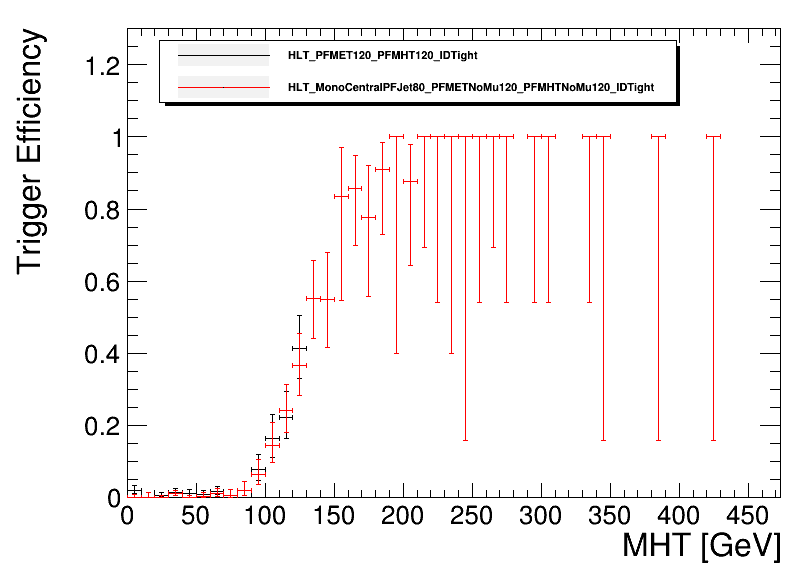

In [159]:
# W -> hadronic


c = rt.TCanvas('c','c', 800, 600)
h = {}
leg = rt.TLegend(0.2,0.82,0.85,0.93);
leg.SetTextSize(0.02)

bins = [0,10,20,30,40,50,60,80,100,200,300,400]
bins = [50,0,500]
xaxis = mht['whad']
xaxis_title = "MHT [GeV]"
hm = create_TH1D(xaxis, 'hm1', axis_title = [xaxis_title,'Trigger Efficiency'], binning=bins,weights = trigger_decision['whad'][310])
hb = create_TH1D(xaxis, 'hb1', axis_title = [xaxis_title,'Trigger Efficiency'], binning=bins)
pEff1 = rt.TEfficiency(hm,hb)
pEff1.SetLineColor(std_color_list[0])
leg.AddEntry(pEff1,trigger_names[310])
pEff1.Draw()

hm = create_TH1D(xaxis, 'hm1', axis_title = [xaxis_title,'Trigger Efficiency'], binning=bins,weights = trigger_decision['whad'][471])
hb = create_TH1D(xaxis, 'hb1', axis_title = [xaxis_title,'Trigger Efficiency'], binning=bins)
pEff2 = rt.TEfficiency(hm,hb)
pEff2.SetLineColor(std_color_list[1])
leg.AddEntry(pEff2,trigger_names[471])
pEff2.Draw('same')

leg.Draw()
# c.SetLogy()
c.Draw()
pEff1.GetPaintedGraph().GetYaxis().SetRangeUser(0,1.3)

c.SaveAs("../../plots/trigger_efficiency/whad_trigger310_471_mht.pdf")

In [ ]:
# W -> mu nu


c = rt.TCanvas('c','c', 800, 600)
h = {}
leg = rt.TLegend(0.7,0.5,0.9,0.7);
leg.SetTextSize(0.03)

xaxis = mu_pt
bins = [0,10,20,30,40,50,60,80,100,250]
xaxis_title = "Muon pT [GeV]"
hm = create_TH1D(xaxis, 'hm1', axis_title = [xaxis_title,'Trigger Efficiency'], binning=bins,weights = trigger_decision['wmunu'][136])
hb = create_TH1D(xaxis, 'hb1', axis_title = [xaxis_title,'Trigger Efficiency'], binning=bins)
pEff1 = rt.TEfficiency(hm,hb)
pEff1.SetLineColor(std_color_list[0])
leg.AddEntry(pEff1,trigger_names[136])
pEff1.Draw()

hm = create_TH1D(xaxis, 'hm1', axis_title = [xaxis_title,'Trigger Efficiency'], binning=bins,weights = trigger_decision['wmunu'][196])
hb = create_TH1D(xaxis, 'hb1', axis_title = [xaxis_title,'Trigger Efficiency'], binning=bins)
pEff2 = rt.TEfficiency(hm,hb)
pEff2.SetLineColor(std_color_list[1])
leg.AddEntry(pEff2,trigger_names[196])
pEff2.Draw('same')

leg.Draw()
# c.SetLogy()
c.Draw()
pEff1.GetPaintedGraph().GetYaxis().SetRangeUser(0,1)

c.SaveAs("../../plots/trigger_efficiency/wmunu_trigger136_196_mupt.pdf")

# VBF

In [160]:
# inclusive trigger efficiency * acceptance
trigger_vbfh = [310]#mu,mu, pfmet, ele,met
pfMet = {}
mht = {}

trigger_decision = {}

for k,v in cs.items():
    trigger_decision[k] = {}
T=tree['vbfh']    
gParticleId = T['gParticleId']
gParticlePt = T['gParticlePt']
gParticleMotherId = T['gParticleMotherId']
gParticleMotherIndex = T['gParticleMotherIndex']
gParticleStatus = T['gParticleStatus']
jetE = T['jetE']
jetPt = T['jetPt']
jetEta = T['jetEta']
jetPhi = T['jetPhi']
hlt = T['HLTDecision']
pfMetPt = T['pfMetPt']
nJets = T['nJets']
keys = ['vbfh']


for tr in trigger_vbfh:
    for key in keys:
        trigger_decision[key][tr] = []
        pfMet[key] = []
        mht[key] = []
for i in range(len(T['isQCD'])): #loop over all events
    key = 'vbfh'
    for tr in trigger_vbfh:
        trigger_decision[key][tr].append(hlt[i][tr])

    #MHT & pfMet calculation
    jet_sum = rt.TLorentzVector()
    for j in range(nJets[i]):
        temp = rt.TLorentzVector()
        temp.SetPtEtaPhiE(jetPt[i][j],jetEta[i][j],jetPhi[i][j],jetE[i][j])
        jet_sum += temp
    mht[key].append(jet_sum.Pt())
    pfMet[key].append(pfMetPt[i])

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: vbfh (Potential memory leak).
Info in <TCanvas::Print>: pdf file ../plots/trigger_efficiency/vbfh_met_mht.pdf has been created


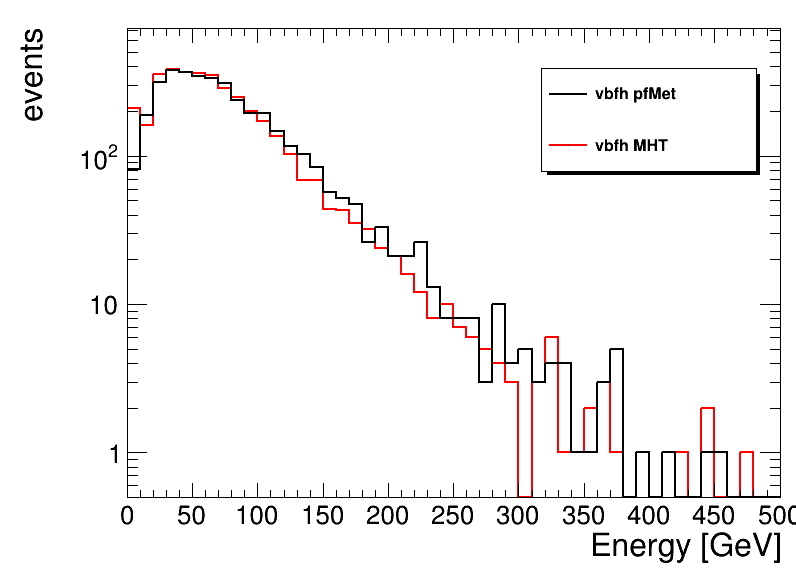

In [168]:
# Plotting MET MHT
c = rt.TCanvas('c','c', 800, 600)
h = {}
leg = rt.TLegend(0.68,0.70,0.95,0.88);
leg.SetTextSize(0.03)
# h['metggh'] = create_TH1D( met['ggh'], axis_title=['MET [GeV]', 'events'], name=k, binning=[50,0,500])
# h['mhtggh'] = create_TH1D( mht['ggh'], axis_title=['MHT [GeV]', 'events'], name=k, binning=[50,0,500])
h['mhtvbfh'] = create_TH1D( mht['vbfh'], axis_title=['Energy [GeV]', 'events'], name=k, binning=[50,0,500])
h['pfMetvbfh'] = create_TH1D( pfMet['vbfh'], axis_title=['Energy [GeV]', 'events'], name=k, binning=[50,0,500])

h['pfMetvbfh'].SetLineColor(std_color_list[0])
h['mhtvbfh'].SetLineColor(std_color_list[1])
h['mhtvbfh'].Draw('same')
h['pfMetvbfh'].Draw('same')


leg.AddEntry(h['pfMetvbfh'],'vbfh pfMet')

leg.AddEntry(h['mhtvbfh'],'vbfh MHT')
# leg.AddEntry(h['metggh'],'ggh MET')
# leg.AddEntry(h['mhtggh'],'ggh MHT')

leg.Draw()
c.SetLogy()
c.Draw()

c.SaveAs("../../plots/trigger_efficiency/vbfh_met_mht.pdf")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: hm1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hb1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hm1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hb1 (Potential memory leak).
Info in <TCanvas::Print>: pdf file ../plots/trigger_efficiency/vbfh_trigger310_pfmet_mht.pdf has been created


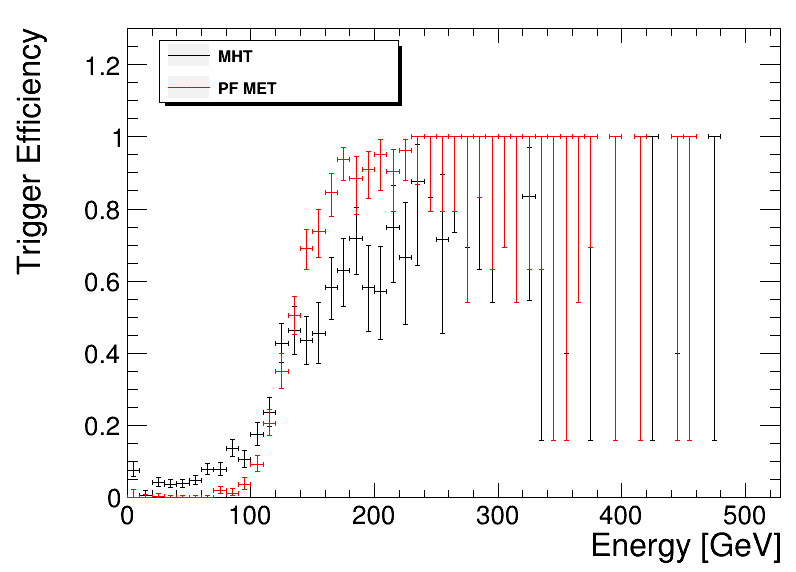

In [167]:
c = rt.TCanvas('c','c', 800, 600)
h = {}
leg = rt.TLegend(0.2,0.82,0.5,0.93);
leg.SetTextSize(0.03)

bins = [0,10,20,30,40,50,60,80,100,200,300,400]
bins = [50,0,500]
xaxis = mht['vbfh']
xaxis_title = "Energy [GeV]"
hm = create_TH1D(xaxis, 'hm1', axis_title = [xaxis_title,'Trigger Efficiency'], binning=bins,weights = trigger_decision['vbfh'][310])
hb = create_TH1D(xaxis, 'hb1', axis_title = [xaxis_title,'Trigger Efficiency'], binning=bins)
pEff1 = rt.TEfficiency(hm,hb)
pEff1.SetLineColor(std_color_list[0])
leg.AddEntry(pEff1,'MHT')
pEff1.Draw()

xaxis = pfMet['vbfh']
hm = create_TH1D(xaxis, 'hm1', axis_title = [xaxis_title,'Trigger Efficiency'], binning=bins,weights = trigger_decision['vbfh'][310])
hb = create_TH1D(xaxis, 'hb1', axis_title = [xaxis_title,'Trigger Efficiency'], binning=bins)
pEff2 = rt.TEfficiency(hm,hb)
pEff2.SetLineColor(std_color_list[1])
leg.AddEntry(pEff2,'PF MET')
pEff2.Draw('same')

leg.Draw()
# c.SetLogy()
c.Draw()
pEff1.GetPaintedGraph().GetYaxis().SetRangeUser(0,1.3)

c.SaveAs("../../plots/trigger_efficiency/vbfh_trigger310_pfmet_mht.pdf")

In [ ]:
# Plotting efficiency vs met
c = rt.TCanvas('c','c', 800, 600)
h = {}
leg = rt.TLegend(0.20,0.780,0.67,0.94);
leg.SetTextSize(0.02)
key = 'vbfh'
bins = [0,30,40,60,80,100.150,250,500]
# bins = [0,10,20,30,40,50,100]
drawMht = 0

pEff = []
v = trigger_decision[key][2]
if drawMht:
    xaxis = mht[key]
    xaxis_title = "MHT [GeV]"
else:
    xaxis = pfMet[key]
    xaxis_title = "PF MET [GeV]"
v = np.array(v)
hm = create_TH1D(xaxis, 'hm'+str(i), axis_title = [xaxis_title,'Trigger Efficiency'], binning=[50,0,600],weights = v)
hb = create_TH1D(xaxis, 'hb'+str(i), axis_title = [xaxis_title,'Trigger Efficiency'], binning=[50,0,600])
pEff.append(rt.TEfficiency(hm,hb))

if drawMht:
    xaxis = xaxis[pfMet['vbfh']>110]
    v = v[pfMet['vbfh']>110]
else:
    xaxis = xaxis[mht['vbfh']>110]
    v = v[mht['vbfh']>110]
hm = create_TH1D(xaxis, 'hm'+str(i), axis_title = [xaxis_title,'Trigger Efficiency'], binning=[50,0,600],weights = v)
hb = create_TH1D(xaxis, 'hb'+str(i), axis_title = [xaxis_title,'Trigger Efficiency'], binning=[50,0,600])
pEff.append(rt.TEfficiency(hm,hb))

pEff[0].SetLineColor(std_color_list[0])
pEff[1].SetLineColor(std_color_list[1])

pEff[0].Draw()
pEff[1].Draw('same')
if drawMht:
    leg.AddEntry(pEff[0],'without pfMET cut')
    leg.AddEntry(pEff[1],'pfMET > 110 GeV')
else:
    leg.AddEntry(pEff[0],'without MHT cut')
    leg.AddEntry(pEff[1],'MHT > 110 GeV')
# hb.Draw()
# hm.Draw('same')
leg.Draw()
# c.SetLogy()
c.Draw()
pEff[0].GetPaintedGraph().GetYaxis().SetRangeUser(0,1.3)
if drawMht:
    c.SaveAs("../../plots/trigger_efficiency/trigger_efficiency_mht_pfmetcut.pdf")
else:
    c.SaveAs("../../plots/trigger_efficiency/trigger_efficiency_pfmet_mhtcut.pdf")


In [ ]:
# trigger efficiency plot in 2D map
c = rt.TCanvas('c','c', 800, 600)
xy = np.column_stack((pfMet[k],mht[k]))
hm = create_TH2D(xy, axis_title = ['pfMet [GeV]','MHT [GeV]','Events'], binning=[50,0,500,50,0,500],weights = trigger_decision['vbfh'][2])
hb = create_TH2D(xy, axis_title = ['pfMet [GeV]','MHT [GeV]','Events'], binning=[50,0,500,50,0,500])
hm.Divide(hb)
hm.Draw('colz')
c.SetRightMargin(0.13)

# pEff = rt.TEfficiency(hm,hb)
# pEff.Draw()
c.Draw()
c.SaveAs("../../plots/trigger_efficiency/trigger_efficiency_HLT_PFMET110_PFMHT110_IDTight_pfmet_mht_"+key+".pdf")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Info in <TCanvas::Print>: pdf file ../plots/trigger_efficiency/zmumu_muonpt_2d.pdf has been created


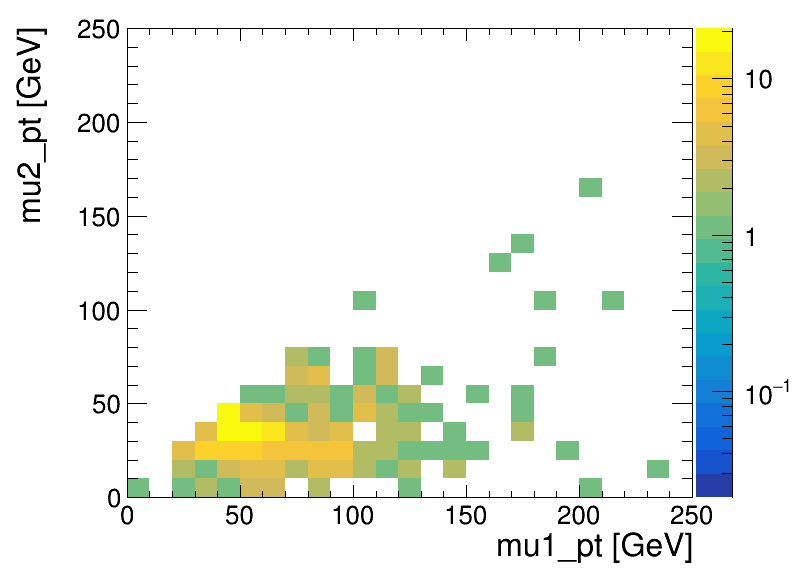

In [174]:
c = rt.TCanvas('c1','c1', 800, 600)
key = 'zmumu'
mapping = create_TH2D(np.column_stack((mu1_pt,mu2_pt)), axis_title = ['mu1_pt [GeV]','mu2_pt [GeV]','Events'], binning=[25,0,250,25,0,250])
mapping.Draw('colz')
c.SetRightMargin(0.13)
c.SetLogz()
c.Draw()
c.SaveAs("../../plots/trigger_efficiency/"+key+"_muonpt_2d.pdf")